In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t_data = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'])

In [3]:
t_data.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


Text(0.5, 1.0, 'Time series plot')

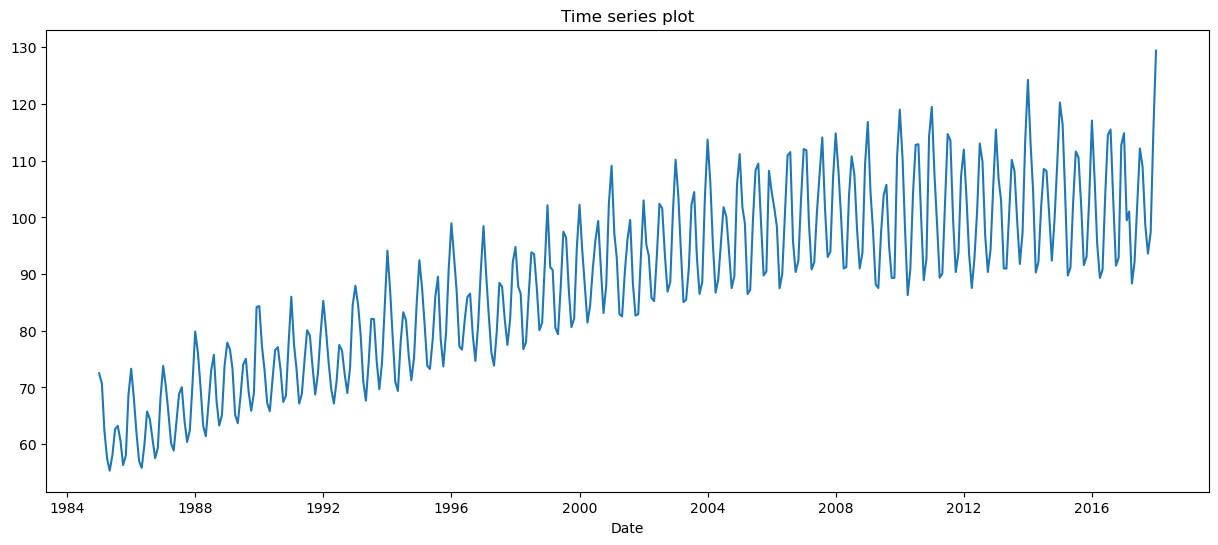

In [4]:
plt.figure(figsize=(15,6))
plt.plot(t_data["DATE"], t_data["Value"])
plt.xlabel("Date")
plt.ylabel("")
plt.title("Time series plot")

In [5]:
def my_auto_corr(df, nlags=2):
    '''
    Returns autocorrelation coefficient for lags [nlags, 0]
    
    df: dataframe
        Input dataframe of time series
    nlags: int
           maximum number of lags, default 2
    
    Returns
    array: autocorrelation coefficients for lags [nlags, 0]
    '''
    def autocorr(y, lag=2):
        '''
        Calculates autocorrelation coefficient for single lag value
        
        y: array
           Input time series array
        lag: int, default: 2 
             'kth' lag value
        
        Returns
        int: autocorrelation coefficient 
        '''
        y = np.array(y).copy()
        y_bar = np.mean(y) #y_bar = mean of the time series y
        denominator = sum((y - y_bar) ** 2) #sum of squared differences between y(t) and y_bar
        numerator_p1 = y[lag:] - y_bar #y(t)-y_bar: difference between time series (from 'lag' till the end) and y_bar
        numerator_p2 = y[:-lag] - y_bar #y(t-k)-y_bar: difference between time series (from the start till lag) and y_bar
        numerator = sum(numerator_p1 * numerator_p2) #sum of y(t)-y_bar and y(t-k)-y_bar
        return (numerator / denominator)
    
    acf = [1] #initializing list with autocorrelation coefficient for lag k=0 which is always 1
    for i in range(1, (nlags + 1)):
        acf.append(autocorr(df.iloc[:, 0].values, lag=i)) #calling autocorr function for each lag 'i'
    return np.array(acf)

In [6]:
my_auto_corr(df=t_data["Value"].reset_index(), nlags=5)

array([1.        , 0.99244332, 0.98488684, 0.97733074, 0.96977522,
       0.96222046])

In [7]:
from statsmodels.graphics import tsaplots

In [8]:
tsaplots.acf(t_data["Value"].reset_index().iloc[:,0].values,nlags=5, fft= False)

array([1.        , 0.99244332, 0.98488684, 0.97733074, 0.96977522,
       0.96222046])

In [9]:
from statsmodels.tsa.stattools import acf
acf_values = acf(t_data["Value"].reset_index().iloc[:,0].values, fft=False, nlags=5)
acf_values

array([1.        , 0.99244332, 0.98488684, 0.97733074, 0.96977522,
       0.96222046])

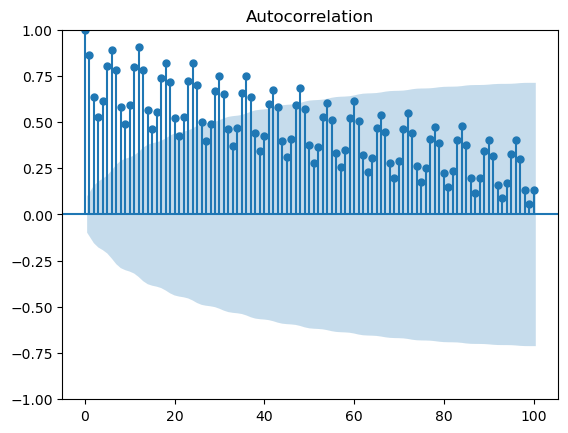

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(t_data['Value'], lags=100);